In [133]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt

In [134]:
image = load_img('/content/jaguar-f-type-project-7-facelift-won-t-happen-pre-facelift-sold-out-years-ago_4.jpg', target_size=(224, 224))

In [135]:
image = img_to_array(image)

In [136]:
image.shape

(224, 224, 3)

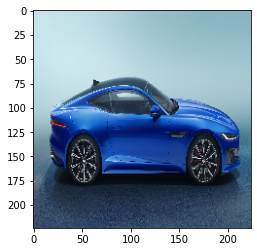

In [137]:
plt.imshow(image.astype('uint8'))

reshaping image data for the model

In [138]:
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

preparing the image for the VGG model


In [139]:
image = preprocess_input(image)

loading the VGG16 model

In [140]:
model = VGG16()

In [141]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

 predicting the probability across all (1000) output classes

In [142]:
yhat = model.predict(image)

convert the probabilities to class labels

In [143]:
labels = decode_predictions(yhat)
labels

[[('n04285008', 'sports_car', 0.82221705),
  ('n03100240', 'convertible', 0.094322994),
  ('n04037443', 'racer', 0.037905358),
  ('n02974003', 'car_wheel', 0.036929596),
  ('n03459775', 'grille', 0.0043340516)]]

retrieve the most likely result, i.e., highest probability

In [144]:
label = labels[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

sports_car (82.22%)
